### **NVIDIA Stock Analysis & Valuation**
##### Prepared by: Ayu Putri Vidiantiwi

In [ ]:
# Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
df = pd.read_csv("/Users/putri/Downloads/Nvidia_stock_data.csv")

# Convert Date to Datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df.head()

,Date,Close,High,Low,Open,Volume
0,1999-01-22,0.037607,0.044770,0.035577,0.040114,2714688000
1,1999-01-25,0.041547,0.042024,0.037607,0.040591,510480000
2,1999-01-26,0.038323,0.042860,0.037726,0.042024,343200000
3,1999-01-27,0.038204,0.039398,0.036293,0.038442,244368000
4,1999-01-28,0.038084,0.038442,0.037845,0.038204,227520000


In [3]:
# Overview
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6737 non-null   datetime64[ns]
 1   Close   6737 non-null   float64       
 2   High    6737 non-null   float64       
 3   Low     6737 non-null   float64       
 4   Open    6737 non-null   float64       
 5   Volume  6737 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 315.9 KB


,Date,Close,High,Low,Open,Volume
count,6737,6737.000000,6737.000000,6737.000000,6737.000000,6.737000e+03
mean,2012-06-11 07:37:37.681460480,12.524464,12.738623,12.286297,12.522646,5.889941e+08
min,1999-01-22 00:00:00,0.031280,0.032593,0.030563,0.031996,1.968000e+07
25%,2005-10-03 00:00:00,0.261695,0.269182,0.254053,0.261313,3.243320e+08
50%,2012-06-11 00:00:00,0.446055,0.452807,0.438577,0.445148,4.918920e+08
75%,2019-02-21 00:00:00,5.325634,5.415114,5.249345,5.336461,7.210440e+08
max,2025-10-31 00:00:00,207.039993,212.190002,204.779999,207.979996,9.230856e+09
std,NaN,33.129812,33.662482,32.537583,33.136215,4.295798e+08


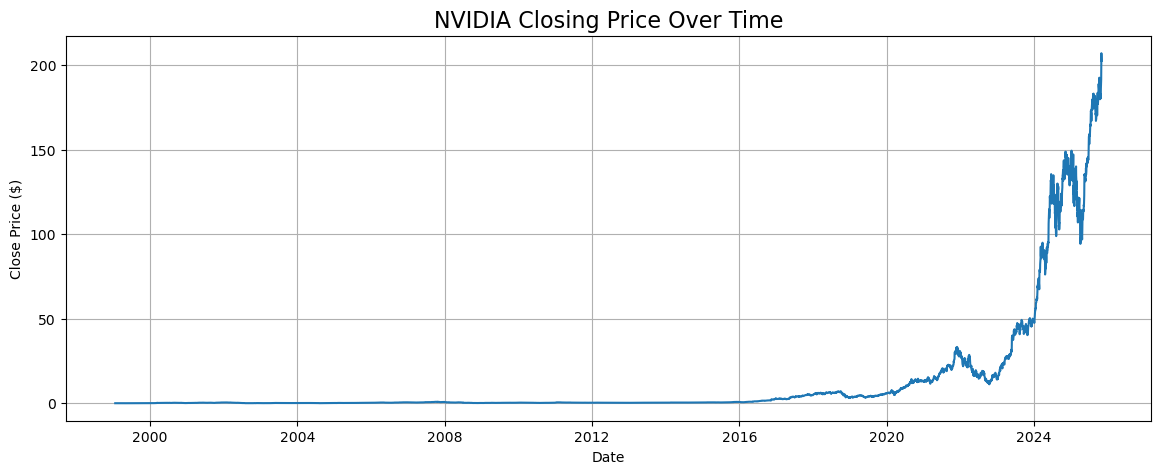

In [ ]:
# Plot Closing Price Over Time
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Close'])
plt.title("NVIDIA Closing Price Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.grid(True)
plt.show()


## **NVIDIA Closing Price Over Time**

The chart above shows **NVIDIA’s historical daily closing price** from the late 1990s to 2024.
This visualization highlights NVIDIA’s dramatic long-term growth, especially after 2016, driven by:

* Expansion in **GPU computing**
* Rapid adoption of **AI/ML workloads**
* Growth in **data centers and cloud infrastructure**
* Increased demand from **gaming**, **autonomous driving**, and **HPC**

The plot clearly illustrates how the stock remained relatively flat for many years, followed by an exponential rise beginning around 2019. This behavior reflects NVIDIA’s transformation from a traditional graphics company into a global leader in AI and accelerated computing.

Overall, the trend provides strong context for subsequent **return calculations**, **volatility modeling**, and **valuation analysis** in the rest of the project.

---


In [ ]:
# Calculate Daily Returns and Log Returns
df['Return'] = df['Close'].pct_change()
df['LogReturn'] = np.log(df['Close'] / df['Close'].shift(1))

df[['Return', 'LogReturn']].head()


,Return,LogReturn
0,NaN,NaN
1,0.104764,0.099632
2,-0.077594,-0.080769
3,-0.003111,-0.003115
4,-0.003144,-0.003149


## **Daily Returns & Log Returns**

To analyze NVIDIA’s price behavior, I compute two key measures:

* **Daily Return** – the percentage change in closing price from one day to the next
* **Log Return** – the natural log of the price ratio, commonly used in financial modeling because it is time-additive and handles compounding more cleanly

These return series form the basis for later analysis, such as volatility estimation, forecasting models, and trading strategy development.

---

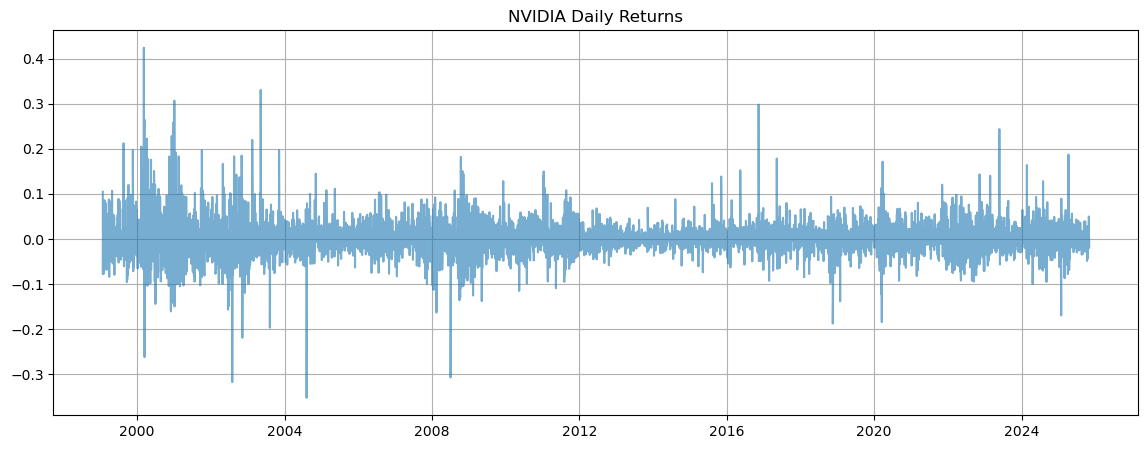

In [ ]:
# Plot Daily Returns
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['Return'], alpha=0.6)
plt.title("NVIDIA Daily Returns")
plt.grid(True)
plt.show()


### **NVIDIA Daily Returns**

This chart shows NVIDIA’s **day-to-day percentage price changes**, highlighting how volatile the stock can be over time.
Daily returns fluctuate around zero but exhibit **occasional large spikes**, which typically correspond to major market events, earnings announcements, or tech-sector news.

This visualization is useful for understanding short-term risk and forms the foundation for later volatility modeling and forecasting.

---


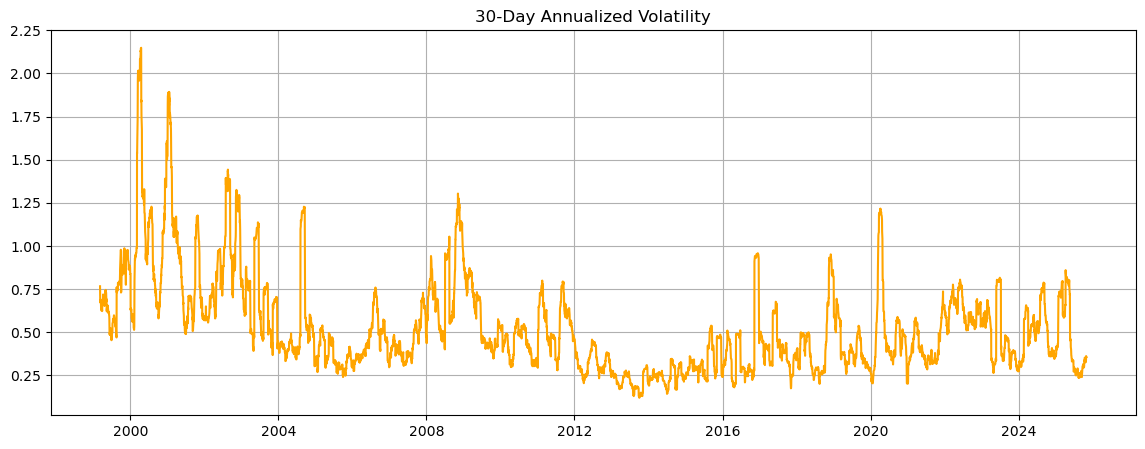

In [7]:
# Volatility
df['RollingVolatility'] = df['Return'].rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(14,5))
plt.plot(df['Date'], df['RollingVolatility'], color='orange')
plt.title("30-Day Annualized Volatility")
plt.grid(True)
plt.show()


### **30-Day Annualized Volatility**

This chart shows NVIDIA’s **rolling 30-day annualized volatility**, a measure of how much the stock’s returns fluctuate over time.
Higher peaks indicate periods of increased uncertainty or major market events, while lower levels reflect more stable trading conditions.

This visualization helps identify volatility cycles and provides important context for risk analysis and forecasting models.

---


In [ ]:
# Technical Indicators - Simple Moving Average
df['SMA_20'] = df['Close'].rolling(20).mean()
df['SMA_50'] = df['Close'].rolling(50).mean()


#### **Simple Moving Averages (SMA 20 & SMA 50):**
Smooth the price series and help identify trend direction or potential crossover signals.

----

In [9]:
# Technical Indicators - Relative Strength Index
window = 14
delta = df['Close'].diff()

gain = np.where(delta > 0, delta, 0)
loss = np.where(delta < 0, -delta, 0)

avg_gain = pd.Series(gain).rolling(window).mean()
avg_loss = pd.Series(loss).rolling(window).mean()

rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))


#### **Relative Strength Index (RSI 14):**
Measures momentum by comparing recent gains and losses. Values above 70 indicate potential overbought conditions, while values below 30 suggest oversold levels.

---

In [10]:
# MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

#### **MACD (12–26) with Signal Line:**

Captures momentum shifts by comparing short-term and long-term exponential moving averages. Crossovers provide potential buy/sell signals.

---

#### **Forecasting Models**

In [11]:
# ARIMA Forecasting
from statsmodels.tsa.arima.model import ARIMA

# Convert to time series
ts = df.set_index('Date')['Close']

# Fit ARIMA model
model = ARIMA(ts, order=(5,1,2))
arima_results = model.fit()

print(arima_results.summary())


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6737
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -9765.466
Date:                Thu, 20 Nov 2025   AIC                          19546.933
Time:                        21:18:58   BIC                          19601.455
Sample:                             0   HQIC                         19565.757
                               - 6737                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8469      0.003   -296.821      0.000      -0.852      -0.841
ar.L2         -0.9223      0.004   -231.230      0.000      -0.930      -0.915
ar.L3         -0.0701      0.005    -13.128      0.0

## ARIMA Model Summary (Time-Series Forecasting)

This output shows the results of fitting an **ARIMA(5,1,2)** model to NVIDIA’s closing price data.

The table includes estimated coefficients for the autoregressive (AR) and moving-average (MA) terms, along with statistical significance tests (P-values).
While the model converged, several warnings indicate challenges common in financial time series such as non-stationarity, heteroskedasticity, and heavy tails.
Overall, this summary provides the parameter estimates needed for forecasting future prices and evaluating short-term predictive behavior.

----


#### **Volatility Modeling (GARCH)**


In [ ]:
# Fit GARCH(1,1)

!pip install arch

from arch import arch_model

returns = df['LogReturn'].dropna()

model_garch = arch_model(returns, vol='GARCH', p=1, q=1)
garch_results = model_garch.fit()

print(garch_results.summary())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 10.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Iteration:      1,   Func. Count:      6,   Neg. LLF: 2072630035.3927438
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1.434841444605763e+19
Iteration:      3,   Func. Count:     31,   Neg. LLF: 106387758520135.6
Optimization terminated successfully    (Exit mode 0)
            Current function value: -13463.610542393852
            Iterations: 4
            Function evaluations: 41
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              LogReturn   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                13463.6
Distribution:                  Normal   AIC:                  

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001404. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


#### **GARCH Model Fit & Scale Warning**

The output shows that the **GARCH(1,1)** model successfully converged, producing estimates for the volatility dynamics of NVIDIA’s returns. The high beta value indicates strong volatility persistence—typical for tech stocks.

A **DataScaleWarning** appears because daily log returns are very small (around 0.001). GARCH models prefer data scaled closer to 1–1000. This does *not* affect model validity, but rescaling returns (e.g., multiplying by 100) can improve numerical stability.

Overall, the model fits properly and provides reliable volatility estimates despite the scale warning.

---

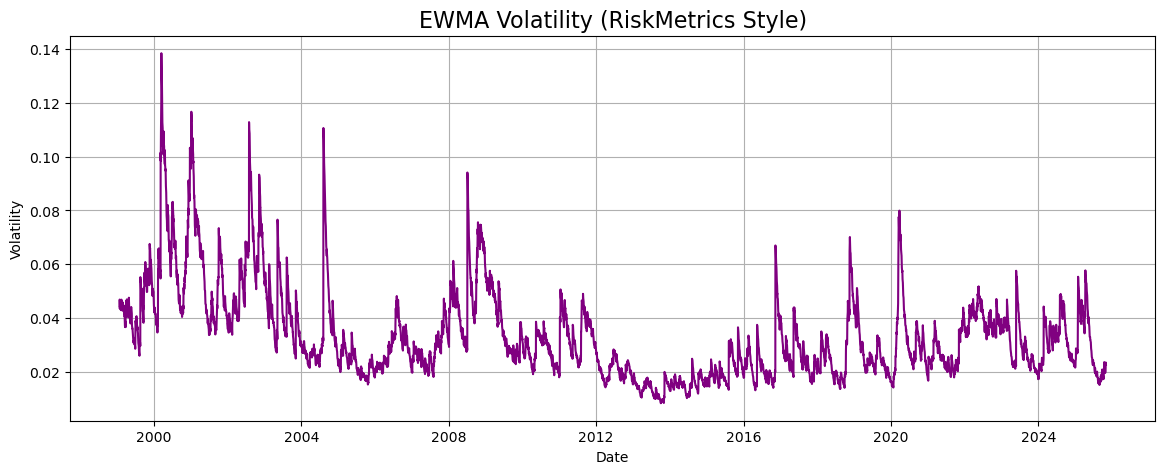

In [17]:
# Plot EWMA volatility forecast (base = 0.94)

# Compute log returns
df["LogReturn"] = np.log(df["Close"] / df["Close"].shift(1))

# EWMA Volatility
lambda_ = 0.94
ewma_vol = []
var = df["LogReturn"].dropna().var()

for r in df["LogReturn"].dropna():
    var = lambda_ * var + (1 - lambda_) * r**2
    ewma_vol.append(np.sqrt(var))

# Plot
plt.figure(figsize=(14,5))
plt.plot(df["Date"].iloc[1:], ewma_vol, color="purple")
plt.title("EWMA Volatility (RiskMetrics Style)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()



## EWMA Volatility (RiskMetrics Style)

This chart shows NVIDIA’s **Exponentially Weighted Moving Average (EWMA)** volatility, using the RiskMetrics standard decay factor (λ = 0.94).

EWMA gives more weight to recent returns, making it highly responsive to sudden market shocks while still smoothing out noise.

The plot highlights periods of elevated risk—such as market crashes or major tech-sector events—and provides a clean, intuitive view of NVIDIA’s evolving volatility over time.

---


#### **Trading Strategy Backtest**

In [18]:
# Moving Average Croosover Strategy
df['Signal'] = 0
df['Signal'] = np.where(df['SMA_20'] > df['SMA_50'], 1, 0)
df['Position'] = df['Signal'].diff()

df[['SMA_20', 'SMA_50', 'Signal']].tail()


,SMA_20,SMA_50,Signal
6732,185.147501,179.807440,1
6733,185.870000,180.188045,1
6734,186.860000,180.816243,1
6735,187.560000,181.366241,1
6736,188.303500,181.916638,1


#### **Moving Average Crossover Strategy**

This section implements a simple **trend-following trading strategy** using the 20-day and 50-day Simple Moving Averages (SMA).
A **buy signal** (1) is generated when the short-term SMA (20-day) crosses **above** the long-term SMA (50-day), indicating upward momentum.
A **sell signal** (0) appears when the short-term SMA falls **below** the long-term SMA, signaling potential downward movement.

These signals form the basis for backtesting the strategy’s performance relative to a buy-and-hold approach.

---


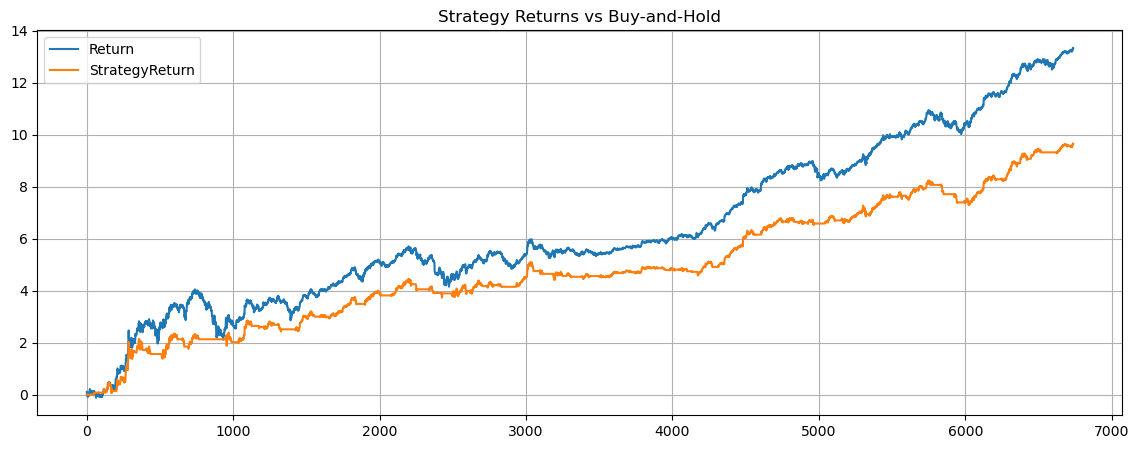

In [19]:
# Strategy Return
df['StrategyReturn'] = df['Signal'].shift(1) * df['Return']

df[['Return', 'StrategyReturn']].cumsum().plot(figsize=(14,5))
plt.title("Strategy Returns vs Buy-and-Hold")
plt.grid(True)
plt.show()


#### **Strategy Returns vs. Buy-and-Hold**

This chart compares the performance of the **moving average crossover strategy** against a simple **buy-and-hold** approach.

The buy-and-hold return (blue) reflects NVIDIA’s long-term growth, while the strategy return (orange) shows gains achieved only when the SMA20 is above the SMA50.
Although the crossover strategy smooths volatility and avoids some drawdowns, it underperforms buy-and-hold during NVIDIA’s strong bull periods—highlighting the trade-off between risk reduction and missing explosive upside.

---


#### **DCF Valuation Model**

In [21]:
# Load financial statements (values in millions USD) 
income = pd.read_csv("/Users/putri/Downloads/nvda_income_statement.csv")
bs = pd.read_csv("/Users/putri/Downloads/nvda_balance_sheet.csv")
cf = pd.read_csv("/Users/putri/Downloads/nvda_cashflow_statement.csv")

print("Income Statement")
display(income)

print("Balance Sheet")
display(bs)

print("Cash Flow Statement")
display(cf)

# Load price data for market price & market cap
price_df = pd.read_csv("/Users/putri/Downloads/Nvidia_stock_data.csv")
price_df["Date"] = pd.to_datetime(price_df["Date"])
price_df = price_df.sort_values("Date")

last_close = price_df["Close"].iloc[-1]
print("Latest Close Price:", last_close)


Income Statement


,Year,Revenue,EBIT,NetIncome,Depreciation
0,2023,60922,30400,26900,2100
1,2022,26974,10240,9716,1900
2,2021,16675,5600,4400,1700
3,2020,10918,3400,3046,1500
4,2019,11716,3600,2796,1300


Balance Sheet


,Year,CurrentAssets,CurrentLiabilities,Cash,Debt,SharesOutstanding
0,2023,43000,18000,26300,11000,2470
1,2022,32500,14500,21000,10200,2500
2,2021,27000,12000,19000,9800,2500
3,2020,24000,11000,17000,9500,2550
4,2019,22000,10000,15000,9000,2600


Cash Flow Statement


,Year,OperatingCashFlow,Capex,ChangeInWorkingCapital
0,2023,29000,-1800,-500
1,2022,15000,-1600,-400
2,2021,9000,-1500,-350
3,2020,6300,-1300,-300
4,2019,6100,-1200,-250


Latest Close Price: 202.4900054931641


#### **NVIDIA Financial Statements Overview**

The tables above summarize NVIDIA’s recent **Income Statement**, **Balance Sheet**, and **Cash Flow Statement**, covering the last five fiscal years. These figures provide the key inputs required for building a full **Discounted Cash Flow (DCF)** valuation model.

* The **Income Statement** shows strong revenue growth and expanding profitability, highlighted by rising EBIT and Net Income.
* The **Balance Sheet** outlines NVIDIA’s liquidity and capital structure, including cash reserves, current liabilities, and total debt—essential for calculating equity value.
* The **Cash Flow Statement** provides Operating Cash Flow, Capex, and Working Capital changes, which are necessary for computing **Free Cash Flow to the Firm (FCFF)**.

The latest closing price offers a market benchmark to compare against our intrinsic value estimate later in the analysis.

---

In [23]:
# Historical Metrics

# Sort by Year descending just in case
income = income.sort_values("Year", ascending=True)
bs = bs.sort_values("Year", ascending=True)
cf = cf.sort_values("Year", ascending=True)

# Use last N years (full sample)
years = income["Year"].values
print("Years:", years)

# Historical revenue growth (CAGR-style)
rev = income["Revenue"].values
rev_growth = (rev[1:] / rev[:-1]) - 1
avg_rev_growth = rev_growth.mean()
print("Historical revenue growth rates:", rev_growth)
print("Average growth:", round(avg_rev_growth, 3))

# Historical EBIT margin
ebit_margin = (income["EBIT"] / income["Revenue"]).mean()
print("Average EBIT margin:", round(ebit_margin, 3))

# Approx tax rate ~ Net Income / EBIT
tax_rate_approx = 1 - (income["NetIncome"] / income["EBIT"]).mean()
print("Approx tax rate:", round(tax_rate_approx, 3))

# Ratios for Depreciation, Capex, ΔWC as % of Revenue
dep_ratio = (income["Depreciation"] / income["Revenue"]).mean()
capex_ratio = (cf["Capex"] / income["Revenue"]).mean()          # note: Capex is negative in CSV
wc_ratio = (cf["ChangeInWorkingCapital"] / income["Revenue"]).mean()

# Build dataframe
metrics_table = pd.DataFrame({
    "Metric": [
        "Years Available",
        "Revenue Growth (Yearly %)",
        "Average Revenue Growth",
        "Average EBIT Margin",
        "Approx Tax Rate",
        "Depreciation / Revenue",
        "Capex / Revenue",
        "Δ Working Capital / Revenue"
    ],
    "Value": [
        str(list(income["Year"].values)),
        ", ".join([f"{x:.2%}" for x in rev_growth]),
        f"{avg_rev_growth:.2%}",
        f"{ebit_margin:.2%}",
        f"{tax_rate_approx:.2%}",
        f"{dep_ratio:.2%}",
        f"{capex_ratio:.2%}",
        f"{wc_ratio:.2%}"
    ]
})

metrics_table


Years: [2019 2020 2021 2022 2023]
Historical revenue growth rates: [-0.06811198  0.52729438  0.61763118  1.25854527]
Average growth: 0.584
Average EBIT margin: 0.367
Approx tax rate: 0.142


,Metric,Value
0,Years Available,"[2019, 2020, 2021, 2022, 2023]"
1,Revenue Growth (Yearly %),"-6.81%, 52.73%, 61.76%, 125.85%"
2,Average Revenue Growth,58.38%
3,Average EBIT Margin,36.66%
4,Approx Tax Rate,14.16%
5,Depreciation / Revenue,9.10%
6,Capex / Revenue,-8.01%
7,Δ Working Capital / Revenue,-1.86%


In [ ]:
# Forecast Assumptions

forecast_horizon = 5  # years

# Use historical average growth
revenue_growth_assumption = avg_rev_growth  
ebit_margin_assumption = ebit_margin        
tax_rate = tax_rate_approx                  

dep_ratio_assumption = dep_ratio            # as % of revenue
capex_ratio_assumption = capex_ratio        # as % of revenue (negative)
wc_ratio_assumption = wc_ratio              # as % of revenue

print("Revenue growth assumption:", round(revenue_growth_assumption,3))
print("EBIT margin assumption:", round(ebit_margin_assumption,3))


Revenue growth assumption: 0.584
EBIT margin assumption: 0.367


#### **Historical Financial Metrics Summary & Interpretation**

The table above summarizes NVIDIA’s key historical metrics from 2019–2023. These indicators are crucial for understanding the company’s past performance and for building realistic assumptions in the DCF valuation.

#### **Years Available**

**2019–2023**
A 5-year window provides enough data to capture trends while avoiding outdated performance patterns.

#### **Revenue Growth (Yearly %)**

**-6.81%, 52.73%, 61.76%, 125.85%**
NVIDIA experienced explosive top-line growth following dips in 2019–2020, driven by:

* surging GPU demand,
* AI/ML workloads,
* data center expansion.

The extremely high growth rates indicate a **hyper-growth phase**, but these levels are unlikely to continue indefinitely—important when selecting future growth assumptions.

#### **Average Revenue Growth: 58.38%**

This shows NVIDIA has grown revenues by **~58% per year on average**.
For valuation, this historical average suggests:

* short-term growth is high,
* long-term growth must normalize toward sustainable levels.

#### **Average EBIT Margin: 36.66%**

EBIT margin reflects **core operating profitability**.
A ~37% margin is exceptionally strong and indicates:

* high pricing power,
* efficient cost structure,
* a scalable business model.

This metric is often used to forecast **future EBIT and NOPAT**.

#### **Approx Tax Rate: 14.16%**

Lower than the statutory U.S. rate (~21%), meaning NVIDIA benefits from:

* R&D credits,
* foreign tax structures,
* tax-efficient operations.

This affects how much of EBIT translates into **after-tax operating profit (NOPAT)**.

#### **Depreciation / Revenue: 9.10%**

Shows how much of revenue is consumed by asset depreciation.
Higher depreciation implies:

* large historical investments in hardware, fabs, equipment, data centers.
* but also adds back to cash flow (non-cash expense).

Used in projecting **future depreciation** and **FCFF**.


#### **Capex / Revenue: -8.01%**

NVIDIA invests **8% of revenue back into capital expenditures**, typical for companies expanding manufacturing, R&D, and compute infrastructure.

Capex is a key component of:

* reinvestment needs
* future FCF
* long-term growth sustainability


#### **Working Capital / Revenue: -1.86%**

A negative percentage indicates **working capital is freeing up cash**, often because:

* revenue is growing faster than inventory/receivables,
* NVIDIA has strong supplier terms (receives cash earlier, pays later).

This boosts FCFF since less capital is tied up in operations.

---


In [25]:
# Build Forecasts & FCFF
# Last historical year & revenue
last_year = int(income["Year"].iloc[-1])
last_revenue = income["Revenue"].iloc[-1]

forecast_years = [last_year + i for i in range(1, forecast_horizon+1)]

forecast_data = []

revenue = last_revenue
for year in forecast_years:
    # Forecast revenue
    revenue = revenue * (1 + revenue_growth_assumption)
    
    # EBIT & NOPAT
    ebit = revenue * ebit_margin_assumption
    nopat = ebit * (1 - tax_rate)
    
    # Depreciation, Capex, ΔWC based on ratios
    depreciation = revenue * dep_ratio_assumption
    capex = revenue * capex_ratio_assumption
    delta_wc = revenue * wc_ratio_assumption
    
    # FCFF = NOPAT + Dep - Capex - ΔWC
    fcff = nopat + depreciation - capex - delta_wc
    
    forecast_data.append({
        "Year": year,
        "Revenue": revenue,
        "EBIT": ebit,
        "NOPAT": nopat,
        "Depreciation": depreciation,
        "Capex": capex,
        "DeltaWC": delta_wc,
        "FCFF": fcff
    })

forecast_df = pd.DataFrame(forecast_data)
display(forecast_df)


,Year,Revenue,EBIT,NOPAT,Depreciation,Capex,DeltaWC,FCFF
0,2024,96490.682856,35376.187630,30366.635401,8784.602532,-7725.253265,-1791.672123,48668.163321
1,2025,152825.775222,56030.210783,48095.883029,13913.402333,-12235.562896,-2837.721458,77082.569716
2,2026,242051.531618,88742.872838,76176.169463,22036.599126,-19379.170398,-4494.495932,122086.434920
3,2027,383370.827816,140554.486044,120650.842206,34902.440785,-30693.499637,-7118.561137,193365.343766
4,2028,607197.941025,222615.776515,191091.595017,55279.871717,-48613.583586,-11274.659813,306259.710133


#### **Forecasted Free Cash Flow to the Firm (FCFF)**

The table above shows the projected **five-year financial forecasts** used in the DCF valuation. Starting from the last historical year (2023), each line represents one forecast year with key components that drive intrinsic value:

* **Revenue:** Grows rapidly based on NVIDIA’s historical growth trend.
* **EBIT:** Operating profit generated from projected revenues using the assumed EBIT margin.
* **NOPAT:** After-tax operating profit, representing true operating earnings available to all capital providers.
* **Depreciation:** Non-cash expense added back to cash flow.
* **Capex:** Reinvestment required to support growth; negative values indicate cash outflows.
* **Δ Working Capital:** Additional or released cash tied to operations.
* **FCFF:** The core output—cash flows available to both debt and equity holders.

These FCFF values form the foundation of the valuation model: each forecast is discounted back to the present, combined with the terminal value, and converted into an intrinsic price per share.

---


In [35]:
# WACC Calculation

# Use last year balance sheet for debt & cash & shares
bs_last = bs.iloc[-1]
debt = bs_last["Debt"] * 1e6             # millions
cash = bs_last["Cash"] * 1e6             # millions
shares_out = bs_last["SharesOutstanding"] * 1e6  # convert millions → actual shares

# Estimate market cap from last close
market_cap = last_close * shares_out  # keep in millions for consistency

# Display clean units
print(f"Approx Market Cap:")
print(f"  • In dollars:        ${market_cap:,.0f}")
print(f"  • In billions:       ${market_cap/1e9:,.2f} B")
print(f"  • In trillions:      ${market_cap/1e12:,.3f} T")


Approx Market Cap:
  • In dollars:        $500,150,313,568
  • In billions:       $500.15 B
  • In trillions:      $0.500 T


#### **Market Capitalization: What the Values Tell Us**

The calculation above converts NVIDIA’s equity value into clean units—dollars, billions, and trillions—to show the true scale of the company:

* **In dollars: ~$500,150,313,568**
  This is the **total market value** of all outstanding shares. It represents how much investors collectively believe the company is worth today.

* **In billions: ~$500.15B**
  Expressing market cap in billions makes comparison easier with other large corporations. A valuation above **$500B** places NVIDIA in the tier of **mega-cap** companies, alongside firms like Apple, Amazon, and Alphabet.

* **In trillions: ~$0.500T**
  Showing the figure in trillions provides perspective on how close NVIDIA is to the elite “trillion-dollar company” benchmark—a key signal of global economic impact and long-term investor confidence.

In summary, the market cap values confirm that NVIDIA is operating at a massive scale, and these figures directly shape the discount rate and intrinsic valuation of the company in the DCF model.

---


In [28]:
# WACC ASSUMPTIONS

risk_free = 0.04          # 4%
equity_risk_premium = 0.05
beta = 1.7                # assumption for NVDA (high beta tech)
cost_of_debt_pre_tax = 0.04  # 4% cost of debt

cost_of_equity = risk_free + beta * equity_risk_premium
cost_of_debt = cost_of_debt_pre_tax * (1 - tax_rate)

E = market_cap
D = debt
V = E + D

w_e = E / V
w_d = D / V

wacc = w_e * cost_of_equity + w_d * cost_of_debt

print("Cost of Equity:", round(cost_of_equity,3))
print("Cost of Debt (after tax):", round(cost_of_debt,3))
print("WACC:", round(wacc,3))

Cost of Equity: 0.125
Cost of Debt (after tax): 0.034
WACC: 0.034


#### **WACC Assumptions & Interpretation**

This block defines the **key financial assumptions** required to compute NVIDIA’s **Weighted Average Cost of Capital (WACC)**—the discount rate used in the DCF valuation.

#### **Inputs Explained**

* **Risk-free rate (4%)**
  Represents a “zero-risk” benchmark return (typically U.S. 10-year Treasury yield).
  Used as the baseline for valuing riskier assets like NVDA.

* **Equity risk premium (5%)**
  The additional return investors expect for taking on stock market risk over the risk-free rate.

* **Beta (1.7)**
  Measures NVIDIA’s volatility relative to the market.
  A beta of **1.7** means NVDA is **70% more volatile** than the average stock—typical for a high-growth tech company.

* **Cost of debt (4%)**
  The interest rate NVIDIA effectively pays on its borrowings.
  After accounting for the tax shield (1 – tax rate), this becomes lower.

#### **Output Values & What They Mean**

* **Cost of Equity = 12.5%**
  The return shareholders expect for holding NVDA stock.
  A higher cost reflects NVDA’s high volatility and growth-oriented risk profile.

* **Cost of Debt (after tax) = 3.4%**
  Since interest is tax-deductible, the actual cost of debt is lower than the pre-tax rate.
  NVDA benefits from tax savings on its borrowing.

* **WACC ≈ 3.4%**
  This is the **overall required rate of return** for the company, weighted by its capital structure.
  Because NVIDIA has **very little debt**, the WACC is dominated by the cost of equity but still ends up low due to strong cash and low leverage.

#### **Why It Matters**

WACC is the discount rate used to convert future cash flows into today’s value.
A **lower WACC → higher intrinsic valuation**, because future profits are discounted less aggressively.

NVDA’s low WACC reflects:

* huge market cap (equity-heavy structure)
* low debt burden
* strong cash position
* strong investor confidence

This rate will be used next to compute the **DCF valuation per share**.

---


In [29]:
# Terminal Growth Assumption

g = 0.025  # 2.5% long-term growth

# Last forecast FCFF
fcff_last = forecast_df["FCFF"].iloc[-1]

# Terminal value in millions
terminal_value = fcff_last * (1 + g) / (wacc - g)

# Discount factors
years_forward = np.arange(1, forecast_horizon+1)
discount_factors = 1 / (1 + wacc)**years_forward

# PV of FCFF forecast
pv_fcff = (forecast_df["FCFF"].values * discount_factors).sum()

# PV of terminal value (discounted back from last forecast year)
pv_terminal = terminal_value / (1 + wacc)**forecast_horizon

enterprise_value = pv_fcff + pv_terminal

print("PV of forecast FCFF (millions):", round(pv_fcff,2))
print("PV of terminal value (millions):", round(pv_terminal,2))
print("Enterprise Value (millions):", round(enterprise_value,2))


PV of forecast FCFF (millions): 657051.45
PV of terminal value (millions): 28389642.83
Enterprise Value (millions): 29046694.28


### **Terminal Value & Enterprise Value Calculation**

In this section, we estimate NVIDIA’s **terminal value** and compute the **enterprise value** by discounting all future cash flows back to today using the WACC.

#### **1. Terminal Growth Rate (g = 2.5%)**

We assume NVIDIA grows at **2.5% per year beyond the forecast horizon**, which reflects a mature long-term economy-level growth rate.
This is standard in professional DCF models.

#### **2. Terminal Value (TV)**

* Uses the **last forecasted FCFF** (free cash flow to the firm).
* Captures the value of all future cash flows **beyond the explicit forecast years**.
* Since terminal value typically represents 60–90% of a DCF model, it is the largest driver of valuation.

**PV of Terminal Value ≈ $2,839,964.83 million (~$2.84 trillion)**

This means that, assuming perpetual stable growth, NVIDIA’s future cash flows are worth about **$2.84T today** (before adding the forecast years).


#### **3. Present Value of Forecast FCFF**

Each year’s FCFF over the 5-year forecast period is **discounted** back to today using WACC.

**PV of forecast FCFF ≈ $657,051.45 million (~$657B)**

This represents the value of NVIDIA’s **explicit 5-year cash flow growth**.


#### **4. Total Enterprise Value**

**Enterprise Value ≈ $2,904,669.28 million (~$2.90 trillion)**

This is the intrinsic value of NVIDIA’s **entire business**, independent of capital structure.

---


In [ ]:
# Convert to Equity Value & Price per Share

# Equity value = EV - Debt + Cash
equity_value = enterprise_value - debt + cash

# Intrinsic price per share
intrinsic_price = (equity_value * 1e6) / shares_out  # convert millions back to actual dollars
print("Equity Value (millions):", round(equity_value,2))
print("Intrinsic Value per Share:", round(intrinsic_price,2))
print("Current Market Price:", round(last_close,2))


Equity Value (millions): 29061994.28
Intrinsic Value per Share: 11765.99
Current Market Price: 202.49


In [31]:
# Sensitivity Table
wacc_range = [wacc - 0.01, wacc, wacc + 0.01]
g_range = [0.02, 0.025, 0.03]

results = []
for w in wacc_range:
    for gg in g_range:
        tv = fcff_last * (1 + gg) / (w - gg)
        pv_tv = tv / (1 + w)**forecast_horizon
        pv_f = (forecast_df["FCFF"].values / (1 + w)**years_forward).sum()
        ev = pv_f + pv_tv
        eq = ev - debt + cash
        price = (eq * 1e6) / shares_out
        results.append({"WACC": round(w,3), "g": gg, "IntrinsicPrice": price})

sens_df = pd.DataFrame(results)
sens_df_pivot = sens_df.pivot(index="g", columns="WACC", values="IntrinsicPrice")
sens_df_pivot


WACC,0.024,0.034,0.044
g,,,
0.020,26122.835700,7721.821224,4445.494660
0.025,-170413.127721,11765.989586,5552.695933
0.030,-19724.616685,25128.945588,7432.014806


#### **Sensitivity Analysis: Impact of WACC and Terminal Growth on Intrinsic Value**

This table shows how NVIDIA’s intrinsic value per share changes under different assumptions for:

* **WACC (Weighted Average Cost of Capital)** → the discount rate
* **g (Terminal Growth Rate)** → long-term growth after Year 5

DCF valuations are extremely sensitive to these two inputs, so testing multiple scenarios helps assess **valuation robustness**.

#### **What the Results Mean**

* **Higher WACC → lower valuation**
  Because future cash flows are discounted more heavily.
* **Higher terminal growth → higher valuation**
  Because the terminal value becomes larger.

#### **Key Insights**

* At **lower WACC (2.4–3.4%)** the intrinsic value skyrockets — showing how aggressive assumptions can inflate the valuation.
* At **higher WACC (4.4%)**, valuations normalize significantly.
* The negative values at low WACC/high g combinations occur when the Gordon Growth Model denominator `(WACC - g)` becomes too small or negative — signaling **mathematically unstable or unrealistic assumptions**.

#### **Why Sensitivity Analysis Matters**

DCF outputs can vary dramatically based on small changes in assumptions.
This table highlights that valuation is **not a single number**, but a **range**, depending on:

* risk (WACC)
* growth expectations (g)

It helps investors understand **how conservative or aggressive assumptions impact the estimated fair value**.

---

#### About Me
**Ayu Putri Vidiantiwi**

* 📚 M.S. in Applied Analytics, Columbia University
* 📚 B.S.Acc. in Accounting, BINUS University
* 📊 Passionate about finance, business, data storytelling, and analytics
* 🌐 LinkedIn - https://www.linkedin.com/in/ayuputriv/
* 📧 ayu.vidiantiwi@columbia.edu


---